Messwerte:  181


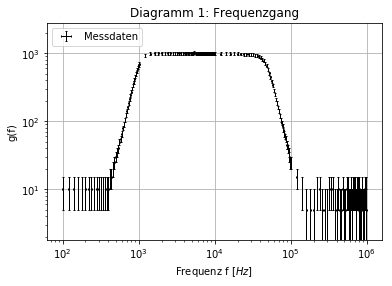

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import odr
from scipy.stats import chi2

#Alle Messwerte

#Messdaten laden
f, U_aus = np.loadtxt('data/Messung_243.txt', skiprows=1, usecols=(0,1), unpack=True)
fehler_f = f * 0.01
fehler_U_aus = np.zeros(len(U_aus)) + 0.001
U_ein = 0.2
fehler_U_ein = 0.01

#g berechnen
D = 1e-3
fehler_D = D*0.002
g = U_aus/(D*U_ein)
fehler_g = np.sqrt((fehler_U_aus/U_aus)**2+(fehler_D/D)**2+(fehler_U_ein/U_ein)**2)*g

#Messdaten
x=f
y=g
delta_x = fehler_f
delta_y = fehler_g

#Plot-Umgebung
x_fit = [min(x), max(x)]
fit = [min(y)/2, max(y)*2]

#Plot
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 1: '+'Frequenzgang')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit, fit, lw=0)
plt.xlabel('Frequenz '+r'f'+' '+r'${[Hz]}$')
plt.ylabel('g(f)')
plt.legend(loc='best')

#Output
plt.savefig("figures/243_Diagramm1.pdf", format="pdf")

#Ausgabe
print('Messwerte: ', len(x))


Messwerte:  119


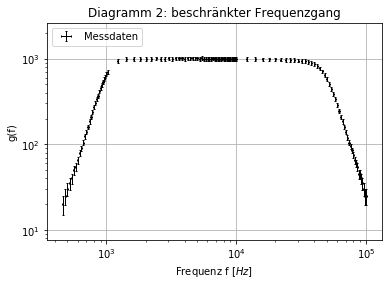

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import odr
from scipy.stats import chi2

#Ausgewählte Messwerte

#Messdaten laden
f, U_aus = np.loadtxt('data/Messung_243.txt', skiprows=1, usecols=(0,1), unpack=True)
fehler_f = f * 0.01
fehler_U_aus = np.zeros(len(U_aus)) + 0.001
U_ein = 0.2
fehler_U_ein = 0.01

#g berechnen
D = 1e-3
fehler_D = D*0.002
g = U_aus/(D*U_ein)
fehler_g = np.sqrt((fehler_U_aus/U_aus)**2+(fehler_D/D)**2+(fehler_U_ein/U_ein)**2)*g

#Messdaten
start=18
cut=44
x=f[start:-cut]
y=g[start:-cut]
delta_x = fehler_f[start:-cut]
delta_y = fehler_g[start:-cut]

#Plot-Umgebung
x_fit = [min(x), max(x)]
fit = [min(y)/2, max(y)*2]

#Plot
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 2: '+'beschränkter Frequenzgang')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit, fit, lw=0)
plt.xlabel('Frequenz '+r'f'+' '+r'${[Hz]}$')
plt.ylabel('g(f)')
plt.legend(loc='best')

#Output
plt.savefig("figures/243_Diagramm2.pdf", format="pdf")

#Ausgabe
print('Messwerte: ', len(x))

V =  992.8523543100293 , Standardfehler =  2.0334954513776275
W_1 =  1028.1756438565026 , Standardfehler =  2.1857346305407037
W_2 =  46446.40050240076 , Standardfehler =  109.98114302861434
n_1 =  5.007488236788535 , Standardfehler =  0.030234707277666105
n_2 =  4.747109449353809 , Standardfehler =  0.026678731079397965


B als Integral für  460.0 Hz < f <  120020.0 Hz beträgt [Hz]: 4.5599e+10 


Chi-Quadrat =  12.247641964122586
Freiheitsgrade =  114
Chi-Quadrat reduziert =  0.10743545582563672
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= 100.0%


Messwerte:  119


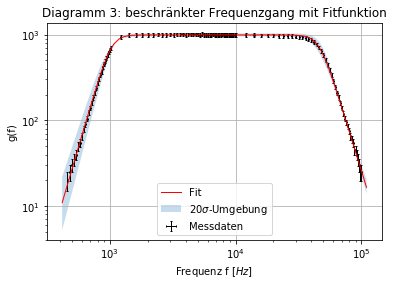

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import odr
from scipy.stats import chi2
import scipy.integrate as integra

#Fitfunktion an Ausgewählte Messwerte

#Messdaten laden
f, U_aus = np.loadtxt('data/Messung_243.txt', skiprows=1, usecols=(0,1), unpack=True)
fehler_f = f * 0.01
fehler_U_aus = np.zeros(len(U_aus)) + 0.001
U_ein = 0.2
fehler_U_ein = 0.01

#g berechnen
D = 1e-3
fehler_D = D*0.002
g = U_aus/(D*U_ein)
fehler_g = np.sqrt((fehler_U_aus/U_aus)**2+(fehler_D/D)**2+(fehler_U_ein/U_ein)**2)*g


#Fit von Messwerten 

def reg(p, x):
    V, W1, W2, n1, n2 = p
    return V/(np.sqrt(1+1/(x/W1)**(2*n1))*np.sqrt(1+(x/W2)**(2*n2)))

# Model
model_func = odr.Model(reg)

#Messdaten
start=18
cut=44
x=f[start:-cut]
y=g[start:-cut]
delta_x = fehler_f[start:-cut]
delta_y = fehler_g[start:-cut]

#Messdaten einlesen
data = odr.RealData(x, y, sx=delta_x, sy=delta_y)

#Model und Daten verknüpfen
odr = odr.ODR(data, model_func, beta0=([1000, 1000, 50000, 5, 5]))

#Regression
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 20 #um n-Sigma-Umgebung zu zeichnen
popt_top = popt + nstd * perr
popt_bot = popt - nstd * perr

#Plot-Umgebung
x_fit = np.linspace(min(x)/1.1, max(x)*1.1, 1000)
fit = reg(popt, x_fit)
fit_top = reg(popt_top, x_fit)
fit_bot = reg(popt_bot, x_fit)
                                              
#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 3: '+'beschränkter Frequenzgang mit Fitfunktion')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
plt.xlabel('Frequenz '+r'f'+' '+r'${[Hz]}$')
plt.ylabel('g(f)')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Output
plt.savefig("figures/243_Diagramm3.pdf", format="pdf")

#Chi-Quadrat
dof=x.size-popt.size
chisquare=np.sum(((reg([*popt], x)-y)/delta_y)**2)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100

#Integral
def reg_square(x, p):
    return reg(p, x)**2

B=integra.quad(reg_square, f[start], f[-cut], args=popt)

#Ausgabe
print("V = ",  popt[0], ", Standardfehler = ", perr[0])
print("W_1 = ", popt[1], ", Standardfehler = ", perr[1])
print("W_2 = ", popt[2], ", Standardfehler = ", perr[2])
print("n_1 = ", popt[3], ", Standardfehler = ", perr[3])
print("n_2 = ", popt[4], ", Standardfehler = ", perr[4])
print('\n')
print('B als Integral für ', f[start], 'Hz < f < ', f[-cut], 'Hz beträgt [Hz]: {value:.4e} '.format(value=B[0]))
print('\n')
print("Chi-Quadrat = ", chisquare)
print("Freiheitsgrade = ", dof)
print("Chi-Quadrat reduziert = ", chisquare_red)
print("Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= "+str(prob)+"%")
print('\n')
print('Messwerte: ', len(x))



c [mV^2] =  0.0007918682150044519 , Standardfehler =  1.647821742658862e-06


Chi-Quadrat =  1.777762535730731
Freiheitsgrade =  5
Chi-Quadrat reduziert =  0.35555250714614617
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= 88.0%


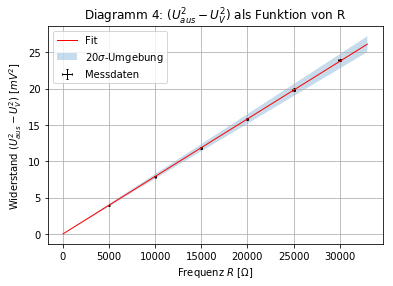

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import odr
from scipy.stats import chi2
import scipy.integrate as integra

#Bestimmung der Boltzmannkonstante

#Messdaten laden
f, U_aus = np.loadtxt('data/Messung_243.txt', skiprows=1, usecols=(0,1), unpack=True)
fehler_f = f * 0.01
fehler_U_aus = np.zeros(len(U_aus)) + 0.001
U_ein = 0.2
fehler_U_ein = 0.01


R=np.array([5e3 , 10e3 , 15e3 , 20e3 , 25e3 , 30e3])
fehler_R=R*0.005

U_aus=np.array([2.4268 , 3.1345 , 3.7103 , 4.2153 , 4.6703 , 5.0869])
fehler_U_aus=np.array([ 0.0072 , 0.0111 , 0.0143 , 0.0154 , 0.0185, 0.0179])

U_V=1.394
fehler_U_V=0.005

d=U_aus**2-U_V**2
fehler_d=np.sqrt((2*U_aus*fehler_U_aus)**2+(2*U_V*fehler_U_V)**2)

#Fit von Messwerten 

def reg(p, x):
    (a) = p
    return a*x

# Model
model_func = odr.Model(reg)

#Messdaten
x=R
y=d
delta_x = fehler_R
delta_y = fehler_d


#Messdaten einlesen
data = odr.RealData(x, y, sx=delta_x, sy=delta_y)

#Model und Daten verknüpfen
odr = odr.ODR(data, model_func, beta0=[ 1.0])

#Regression
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 20 #um n-Sigma-Umgebung zu zeichnen
popt_top = popt + nstd * perr
popt_bot = popt - nstd * perr

#Plot-Umgebung
x_fit = np.linspace(0, max(x)*1.1, 1000)
fit = reg(popt, x_fit)
fit_top = reg(popt_top, x_fit)
fit_bot = reg(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 4: '+r'${({U^2_{aus}}-{U^2_{V}})}$'+' als Funktion von '+r'R')
plt.grid(True)
plt.xlabel('Frequenz '+r'$R$'+' '+r'${[\Omega]}$')
plt.ylabel('Widerstand '+r'${({U^2_{aus}}-{U^2_{V}})}$' + ' ' + r'${[m{V^2}]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Output
plt.savefig("figures/243_Diagramm4.pdf", format="pdf")

#Chi-Quadrat
dof=x.size-popt.size
chisquare=np.sum(((reg([*popt], x)-y)/delta_y)**2)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100

#Ausgabe
print("c [mV^2] = ", popt[0], ", Standardfehler = ", perr[0])
print('\n')
print("Chi-Quadrat = ", chisquare)
print("Freiheitsgrade = ", dof)
print("Chi-Quadrat reduziert = ", chisquare_red)
print("Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= "+str(prob)+"%")